https://github.com/dharavathramdas101/Machine-Learning-Algorithms/blob/main/Insurance%20Premium%20Prediction/Insurence.ipynb

In [155]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
     

In [156]:
df = pd.read_csv(r"global_emissions.csv")

In [157]:
df

Year Country.Name Country.Code   Country.GDP  Country.Population  \
0     1992  Afghanistan          AFG  1.267754e+10            14485543   
1     1993  Afghanistan          AFG  9.834581e+09            15816601   
2     1994  Afghanistan          AFG  7.919857e+09            17075728   
3     1995  Afghanistan          AFG  1.230753e+10            18110662   
4     1996  Afghanistan          AFG  1.207013e+10            18853444   
...    ...          ...          ...           ...                 ...   
2479  2014      Vietnam          VNM  5.098024e+11            91713848   
2480  2015      Vietnam          VNM  5.439311e+11            92677080   
2481  2016      Vietnam          VNM  5.776835e+11            93640440   
2482  2017      Vietnam          VNM  6.177747e+11            94600640   
2483  2018      Vietnam          VNM  6.614884e+11            95545960   

      Emissions.Production.CH4  Emissions.Production.N2O  \
0                         7.13                      2.89   
1                         7.21                      2.93   
2                         7.47                      2.76   
3                         7.83                      2.88   
4                         8.67                      3.12   
...                        ...                       ...   
2479                     84.93                     23.48   
2480                     83.85                     25.91   
2481                     81.85                     24.82   
2482                     81.28                     24.89   
2483                     81.42                     25.44   

      Emissions.Production.CO2.Cement  Emissions.Production.CO2.Coal  \
0                               0.046                          0.022   
1                               0.047                          0.018   
2                               0.047                          0.015   
3                               0.047                          0.015   
4                               0.047                          0.007   
...                               ...                            ...   
2479                           32.694                         70.517   
2480                           34.298                         83.191   
2481                           36.822                         81.561   
2482                           42.735                         77.680   
2483                           49.637                         94.927   

      Emissions.Production.CO2.Gas  Emissions.Production.CO2.Oil  \
0                            0.363                         0.927   
1                            0.352                         0.894   
2                            0.338                         0.860   
3                            0.322                         0.824   
4                            0.308                         0.780   
...                            ...                           ...   
2479                        19.599                        46.196   
2480                        20.463                        55.052   
2481                        20.368                        54.015   
2482                        17.877                        56.957   
2483                        18.554                        60.599   

      Emissions.Production.CO2.Flaring  Emissions.Production.CO2.Other  \
0                                0.022                    0.000000e+00   
1                                0.022                    0.000000e+00   
2                                0.022                    2.220446e-16   
3                                0.022                    2.220446e-16   
4                                0.022                    1.000000e-03   
...                                ...                             ...   
2479                             0.000                    0.000000e+00   
2480                             0.000                    0.000000e+00   
2481                             0.000          

In [158]:
df.head()

Year Country.Name Country.Code   Country.GDP  Country.Population  \
0  1992  Afghanistan          AFG  1.267754e+10            14485543   
1  1993  Afghanistan          AFG  9.834581e+09            15816601   
2  1994  Afghanistan          AFG  7.919857e+09            17075728   
3  1995  Afghanistan          AFG  1.230753e+10            18110662   
4  1996  Afghanistan          AFG  1.207013e+10            18853444   

   Emissions.Production.CH4  Emissions.Production.N2O  \
0                      7.13                      2.89   
1                      7.21                      2.93   
2                      7.47                      2.76   
3                      7.83                      2.88   
4                      8.67                      3.12   

   Emissions.Production.CO2.Cement  Emissions.Production.CO2.Coal  \
0                            0.046                          0.022   
1                            0.047                          0.018   
2                            0.047                          0.015   
3                            0.047                          0.015   
4                            0.047                          0.007   

   Emissions.Production.CO2.Gas  Emissions.Production.CO2.Oil  \
0                         0.363                         0.927   
1                         0.352                         0.894   
2                         0.338                         0.860   
3                         0.322                         0.824   
4                         0.308                         0.780   

   Emissions.Production.CO2.Flaring  Emissions.Production.CO2.Other  \
0                             0.022                    0.000000e+00   
1                             0.022                    0.000000e+00   
2                             0.022                    2.220446e-16   
3                             0.022                    2.220446e-16   
4                             0.022                    1.000000e-03   

   Emissions.Production.CO2.Total  Emissions.Global Share.CO2.Cement  \
0                           1.379                               0.01   
1                           1.333                               0.01   
2                           1.282                               0.01   
3                           1.230                               0.01   
4                           1.165                               0.01   

   Emissions.Global Share.CO2.Coal  Emissions.Global Share.CO2.Gas  \
0                              0.0                            0.01   
1                              0.0                            0.01   
2                              0.0                            0.01   
3                              0.0                            0.01   
4                              0.0                            0.01   

   Emissions.Global Share.CO2.Oil  Emissions.Global Share.CO2.Flaring  \
0                            0.01                                0.01   
1                            0.01                                0.01   
2                            0.01                                0.01   
3                            0.01                                0.01   
4                            0.01                                0.01   

   Emissions.Global Share.CO2.Total  
0                              0.01  
1                              0.01  
2                              0.01  
3                              0.01  
4                              0.00

In [159]:
df.shape

(2484, 20)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                2484 non-null   int64  
 1   Country.Name                        2484 non-null   object 
 2   Country.Code                        2484 non-null   object 
 3   Country.GDP                         2484 non-null   float64
 4   Country.Population                  2484 non-null   int64  
 5   Emissions.Production.CH4            2484 non-null   float64
 6   Emissions.Production.N2O            2484 non-null   float64
 7   Emissions.Production.CO2.Cement     2484 non-null   float64
 8   Emissions.Production.CO2.Coal       2484 non-null   float64
 9   Emissions.Production.CO2.Gas        2484 non-null   float64
 10  Emissions.Production.CO2.Oil        2484 non-null   float64
 11  Emissions.Production.CO2.Flaring    2484 no

In [161]:
df.describe()

Year   Country.GDP  Country.Population  \
count  2484.000000  2.484000e+03        2.484000e+03   
mean   2005.000000  7.909678e+11        6.264477e+07   
std       7.790449  1.984299e+12        1.834772e+08   
min    1992.000000  0.000000e+00        2.601550e+05   
25%    1998.000000  6.144881e+10        5.074450e+06   
50%    2005.000000  2.248733e+11        1.540440e+07   
75%    2012.000000  6.050548e+11        4.884866e+07   
max    2018.000000  1.815162e+13        1.427648e+09   

       Emissions.Production.CH4  Emissions.Production.N2O  \
count               2484.000000               2484.000000   
mean                  71.834473                 24.555829   
std                  150.453654                 58.642876   
min                    0.520000                  0.110000   
25%                    7.460000                  2.550000   
50%                   22.835000                  7.490000   
75%                   66.032500                 21.882500   
max                 1161.420000                552.670000   

       Emissions.Production.CO2.Cement  Emissions.Production.CO2.Coal  \
count                      2484.000000                    2484.000000   
mean                         10.616455                     123.146344   
std                          53.019713                     573.823617   
min                           0.000000                       0.000000   
25%                           0.542750                       0.310250   
50%                           1.830000                       7.394000   
75%                           6.286500                      41.941750   
max                         786.745000                    7493.455000   

       Emissions.Production.CO2.Gas  Emissions.Production.CO2.Oil  \
count                   2484.000000                   2484.000000   
mean                      58.088311                    102.178861   
std                      158.775012                    271.814395   
min                        0.000000                      0.366000   
25%                        2.552750                      8.946750   
50%                       12.499500                     29.233000   
75%                       55.053250                     73.189500   
max                     1641.041000                   2608.477000   

       Emissions.Production.CO2.Flaring  Emissions.Production.CO2.Other  \
count                       2484.000000                     2484.000000   
mean                           3.370653                        2.676818   
std                            7.851043                       12.952656   
min                            0.000000                        0.000000   
25%                            0.000000                        0.000000   
50%                            0.241000                        0.001000   
75%                            2.583250                        1.054000   
max                           76.211000                      171.537000   

       Emissions.Production.CO2.Total  Emissions.Global Share.CO2.Cement  \
count                     2484.000000                        2484.000000   
mean                       300.077331                           1.048998   
std                        939.940620                           4.461195   
min                          0.758000                           0.000000   
25%                         21.525250                           0.060000   
50%                         60.908000                           0.190000   
75%                        220.066000                           0.620000   
max                      10289.989000                          52.750000   

       Emissions.Global Share.CO2.Coal  Emissions.Global Share.CO2.Gas  \
count                      2484.000000                     2484.000000   
mean                          1.059952                        1.061023   
std                           4.545482                        2.948671   
min                   

In [162]:
df.describe().T

count          mean           std  \
Year                                2484.0  2.005000e+03  7.790449e+00   
Country.GDP                         2484.0  7.909678e+11  1.984299e+12   
Country.Population                  2484.0  6.264477e+07  1.834772e+08   
Emissions.Production.CH4            2484.0  7.183447e+01  1.504537e+02   
Emissions.Production.N2O            2484.0  2.455583e+01  5.864288e+01   
Emissions.Production.CO2.Cement     2484.0  1.061645e+01  5.301971e+01   
Emissions.Production.CO2.Coal       2484.0  1.231463e+02  5.738236e+02   
Emissions.Production.CO2.Gas        2484.0  5.808831e+01  1.587750e+02   
Emissions.Production.CO2.Oil        2484.0  1.021789e+02  2.718144e+02   
Emissions.Production.CO2.Flaring    2484.0  3.370653e+00  7.851043e+00   
Emissions.Production.CO2.Other      2484.0  2.676818e+00  1.295266e+01   
Emissions.Production.CO2.Total      2484.0  3.000773e+02  9.399406e+02   
Emissions.Global Share.CO2.Cement   2484.0  1.048998e+00  4.461195e+00   
Emissions.Global Share.CO2.Coal     2484.0  1.059952e+00  4.545482e+00   
Emissions.Global Share.CO2.Gas      2484.0  1.061023e+00  2.948671e+00   
Emissions.Global Share.CO2.Oil      2484.0  9.519122e-01  2.537069e+00   
Emissions.Global Share.CO2.Flaring  2484.0  1.072999e+00  2.428396e+00   
Emissions.Global Share.CO2.Total    2484.0  1.020688e+00  3.089116e+00   

                                           min           25%           50%  \
Year                                  1992.000  1.998000e+03  2.005000e+03   
Country.GDP                              0.000  6.144881e+10  2.248733e+11   
Country.Population                  260155.000  5.074450e+06  1.540440e+07   
Emissions.Production.CH4                 0.520  7.460000e+00  2.283500e+01   
Emissions.Production.N2O                 0.110  2.550000e+00  7.490000e+00   
Emissions.Production.CO2.Cement          0.000  5.427500e-01  1.830000e+00   
Emissions.Production.CO2.Coal            0.000  3.102500e-01  7.394000e+00   
Emissions.Production.CO2.Gas             0.000  2.552750e+00  1.249950e+01   
Emissions.Production.CO2.Oil             0.366  8.946750e+00  2.923300e+01   
Emissions.Production.CO2.Flaring         0.000  0.000000e+00  2.410000e-01   
Emissions.Production.CO2.Other           0.000  0.000000e+00  1.000000e-03   
Emissions.Production.CO2.Total           0.758  2.152525e+01  6.090800e+01   
Emissions.Global Share.CO2.Cement        0.000  6.000000e-02  1.900000e-01   
Emissions.Global Share.CO2.Coal          0.000  0.000000e+00  6.000000e-02   
Emissions.Global Share.CO2.Gas           0.000  5.000000e-02  2.400000e-01   
Emissions.Global Share.CO2.Oil           0.000  8.000000e-02  2.800000e-01   
Emissions.Global Share.CO2.Flaring       0.000  0.000000e+00  7.000000e-02   
Emissions.Global Share.CO2.Total         0.000  8.000000e-02  2.200000e-01   

                                             75%           max  
Year                                2.012000e+03  2.018000e+03  
Country.GDP                         6.050548e+11  1.815162e+13  
Country.Population                  4.884866e+07  1.427648e+09  
Emissions.Production.CH4            6.603250e+01  1.161420e+03  
Emissions.Production.N2O            2.188250e+01  5.526700e+02  
Emissions.Production.CO2.Cement     6.286500e+00  7.867450e+02  
Emissions.Production.CO2.Coal       4.194175e+01  7.493455e+03  
Emissions.Production.CO2.Gas        5.505325e+01  1.641041e+03  
Emissions.Production.CO2.Oil        7.318950e+01  2.608477e+03  
Emissions.Production.CO2.Flaring    2.583250e+00  7.621100e+01  
Emissions.Production.CO2.Other      1.054000e+00  1.715370e+02  
Emissions.Production.CO2.Total      2.200660e+02  1.028999e+04  
Emissions.Global Share.CO2.Cement   6.200000e-01  5.275000e+01  
Emissions.Global Share.CO2.Coal     3.600000e-01  4.993000e+01  
Emissions.Global Share.CO2.Gas      1.010000e+00  2.834000e+01  
Emissions.Global Share.CO2.Oil      6.900000e-01  2.401000e+01  
Emissions.Global Share.CO2.Flaring  7.9000

In [163]:
df['Country.Name'].value_counts()

Afghanistan    27
Nigeria        27
Qatar          27
Portugal       27
Poland         27
               ..
Finland        27
Estonia        27
Egypt          27
Ecuador        27
Vietnam        27
Name: Country.Name, Length: 92, dtype: int64

In [164]:
df['Year'].value_counts()

1992    92
2006    92
2017    92
2016    92
2015    92
2014    92
2013    92
2012    92
2011    92
2010    92
2009    92
2008    92
2007    92
2005    92
1993    92
2004    92
2003    92
2002    92
2001    92
2000    92
1999    92
1998    92
1997    92
1996    92
1995    92
1994    92
2018    92
Name: Year, dtype: int64

In [165]:
# define numerical and categorical columns

In [166]:

numerical_fea = [fea for fea in df.columns if df[fea].dtype != 'O']
categorical_fea = [fea for fea in df.columns if df[fea].dtype == 'O']

In [167]:

print('we have {} numerical features :  \n\n {}'.format(len(numerical_fea),numerical_fea))
print()
print('we have {} categorical features : \n\n {}'.format(len(categorical_fea),categorical_fea))

we have 18 numerical features :  

 ['Year', 'Country.GDP', 'Country.Population', 'Emissions.Production.CH4', 'Emissions.Production.N2O', 'Emissions.Production.CO2.Cement', 'Emissions.Production.CO2.Coal', 'Emissions.Production.CO2.Gas', 'Emissions.Production.CO2.Oil', 'Emissions.Production.CO2.Flaring', 'Emissions.Production.CO2.Other', 'Emissions.Production.CO2.Total', 'Emissions.Global Share.CO2.Cement', 'Emissions.Global Share.CO2.Coal', 'Emissions.Global Share.CO2.Gas', 'Emissions.Global Share.CO2.Oil', 'Emissions.Global Share.CO2.Flaring', 'Emissions.Global Share.CO2.Total']

we have 2 categorical features : 

 ['Country.Name', 'Country.Code']


In [168]:

# Checking missing values

# plotting the missing values count for each column

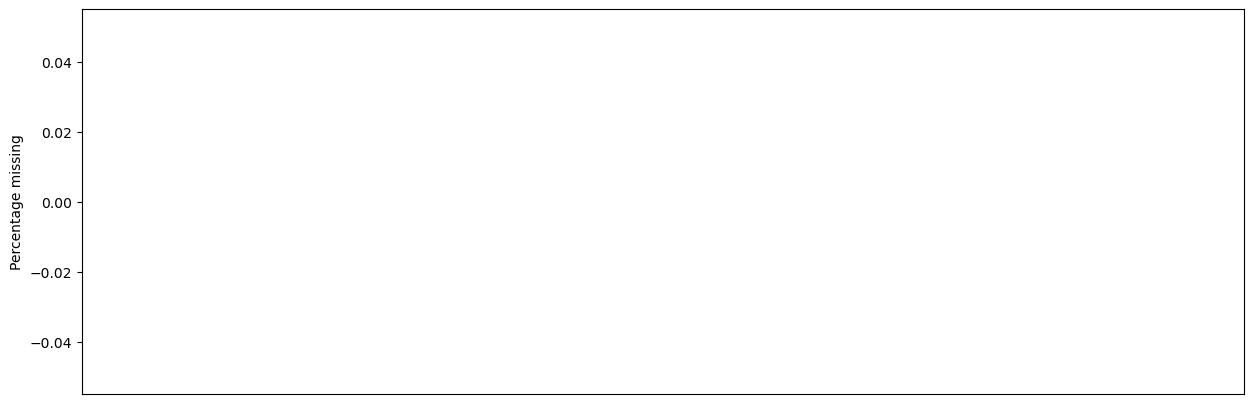

In [169]:
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

No Null values here

Text(0, 0.5, 'count')

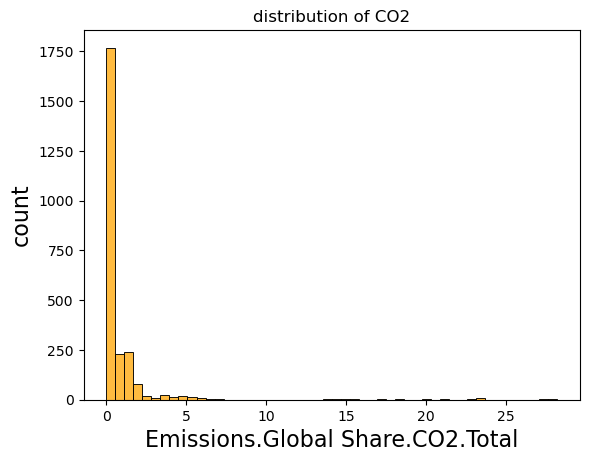

In [170]:

plt.title("distribution of CO2")
p = sns.histplot(x='Emissions.Global Share.CO2.Total',data=df,bins=50,color='orange')
p.set_xlabel("Emissions.Global Share.CO2.Total", fontsize=16)
p.set_ylabel("count",fontsize=16)
     

# Plot distribution of all independent Numerical variables

/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

ValueError: num must be 1 <= num <= 8, not 9

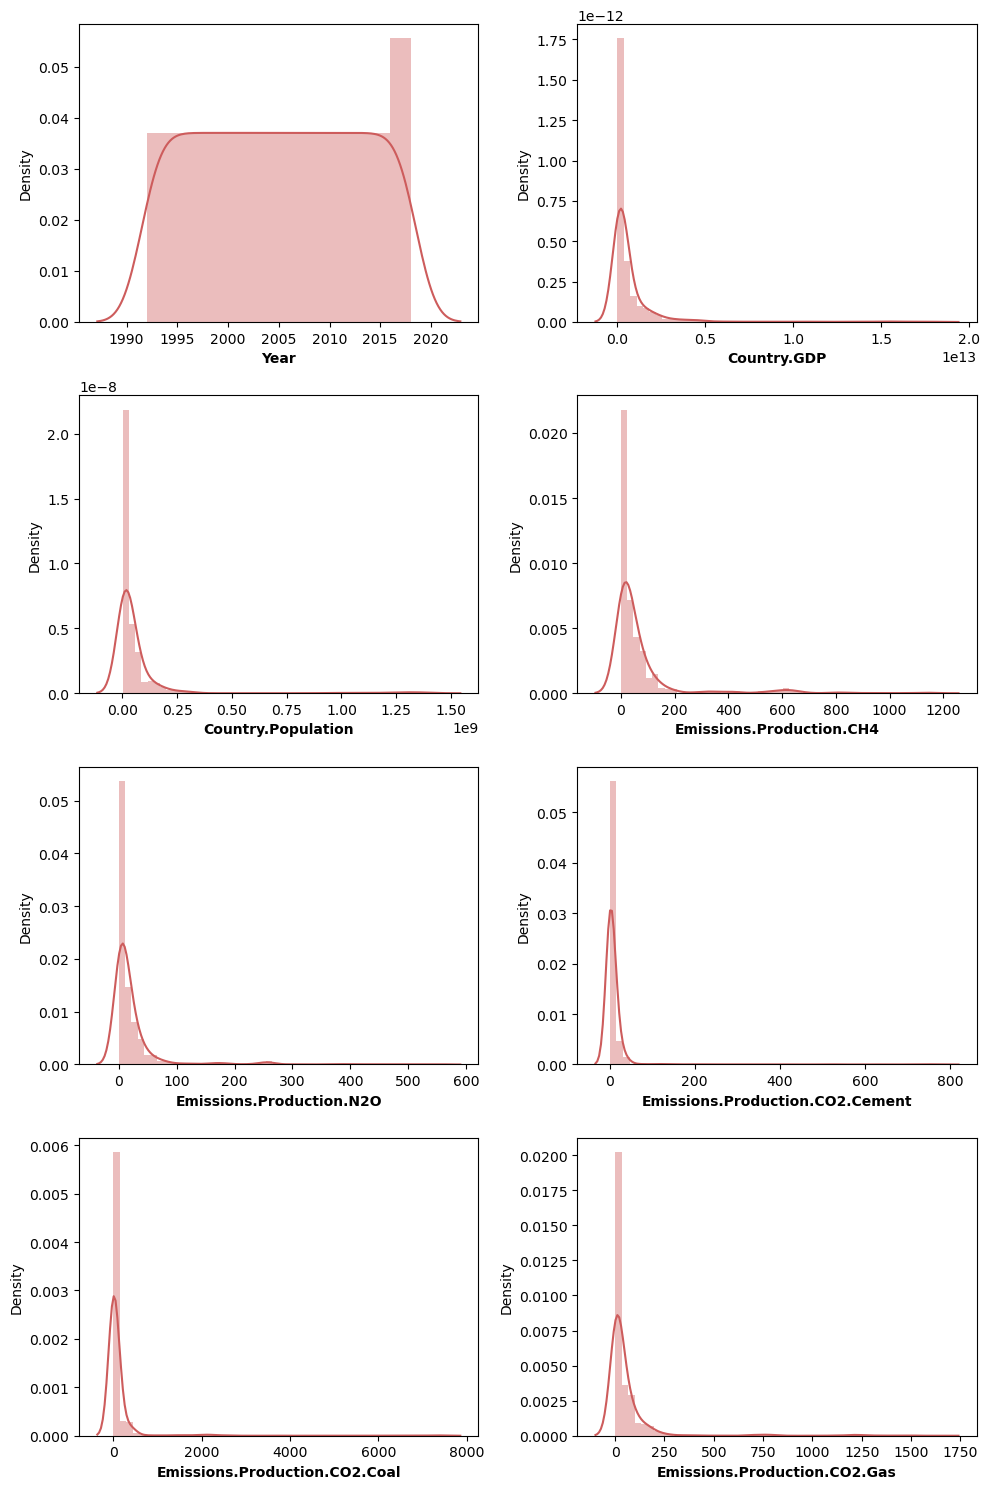

In [171]:
plt.figure(figsize=(10,15))
for i,col in enumerate(numerical_fea):
    plt.subplot(4,2,i+1)
    sns.distplot(x=df[col],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()
     

Asper the above plot most of the features are not normally distributed

# Boxplot (Numerical features)

In [172]:
numerical_fea

['Year',
 'Country.GDP',
 'Country.Population',
 'Emissions.Production.CH4',
 'Emissions.Production.N2O',
 'Emissions.Production.CO2.Cement',
 'Emissions.Production.CO2.Coal',
 'Emissions.Production.CO2.Gas',
 'Emissions.Production.CO2.Oil',
 'Emissions.Production.CO2.Flaring',
 'Emissions.Production.CO2.Other',
 'Emissions.Production.CO2.Total',
 'Emissions.Global Share.CO2.Cement',
 'Emissions.Global Share.CO2.Coal',
 'Emissions.Global Share.CO2.Gas',
 'Emissions.Global Share.CO2.Oil',
 'Emissions.Global Share.CO2.Flaring',
 'Emissions.Global Share.CO2.Total']

ValueError: num must be 1 <= num <= 8, not 9

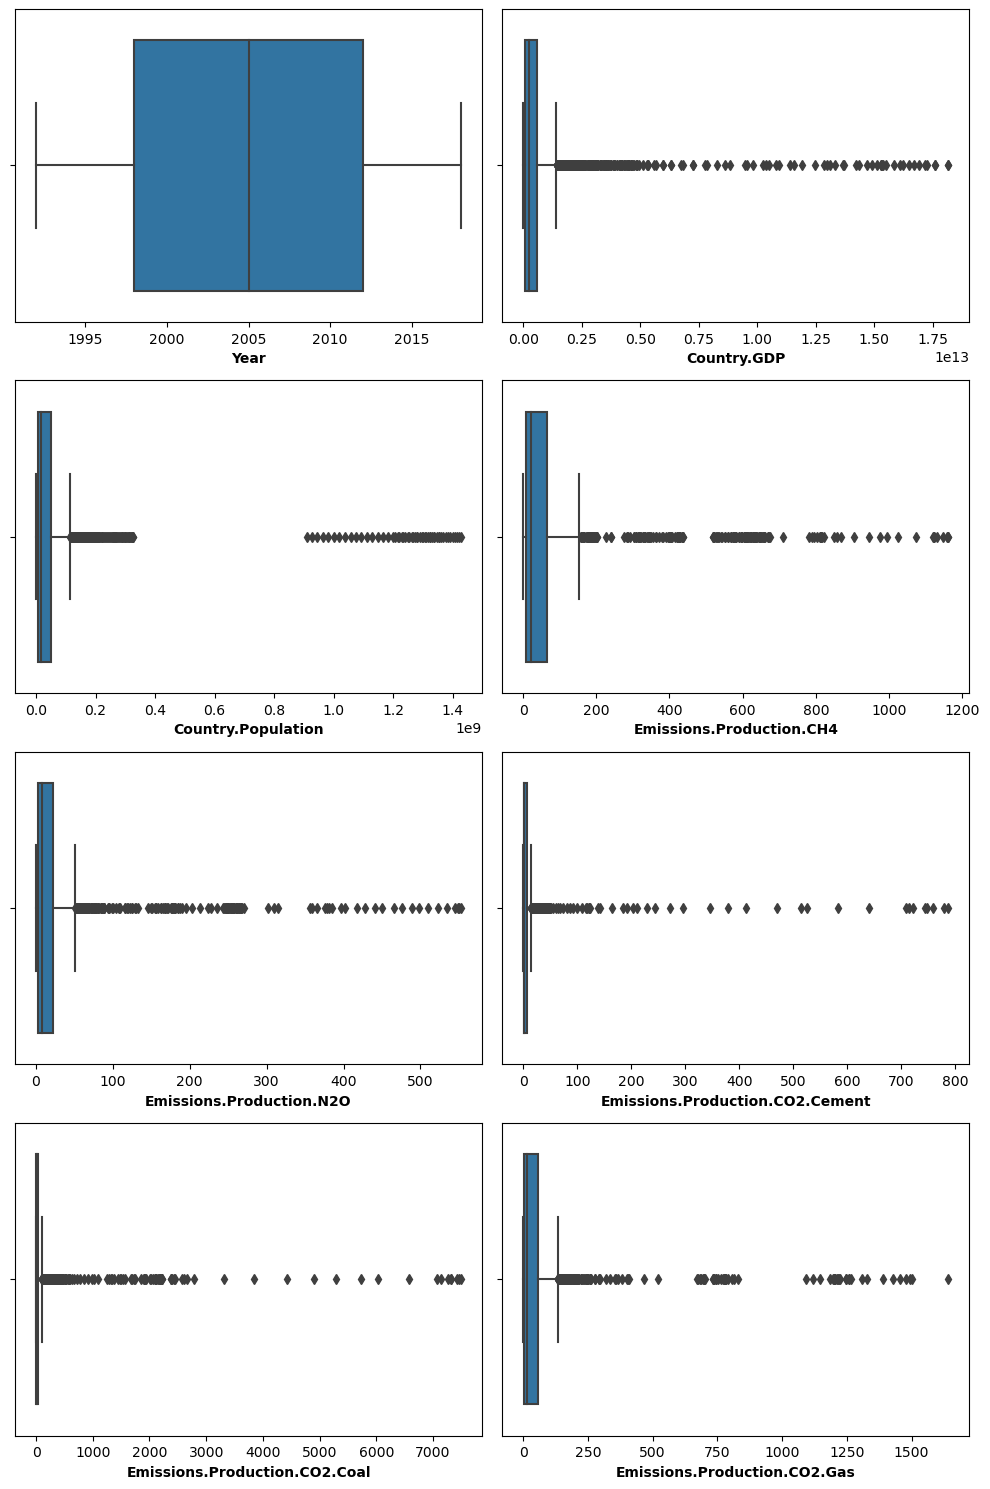

In [173]:

plt.figure(figsize=(10,15))
for i,col in enumerate(numerical_fea):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

# Countplot (categorical features)

In [174]:
categorical_fea

['Country.Name', 'Country.Code']

/var/folders/8v/x5wpqfrj75z_n1t_mwpy_8vm0000gn/T/ipykernel_19216/3198247634.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


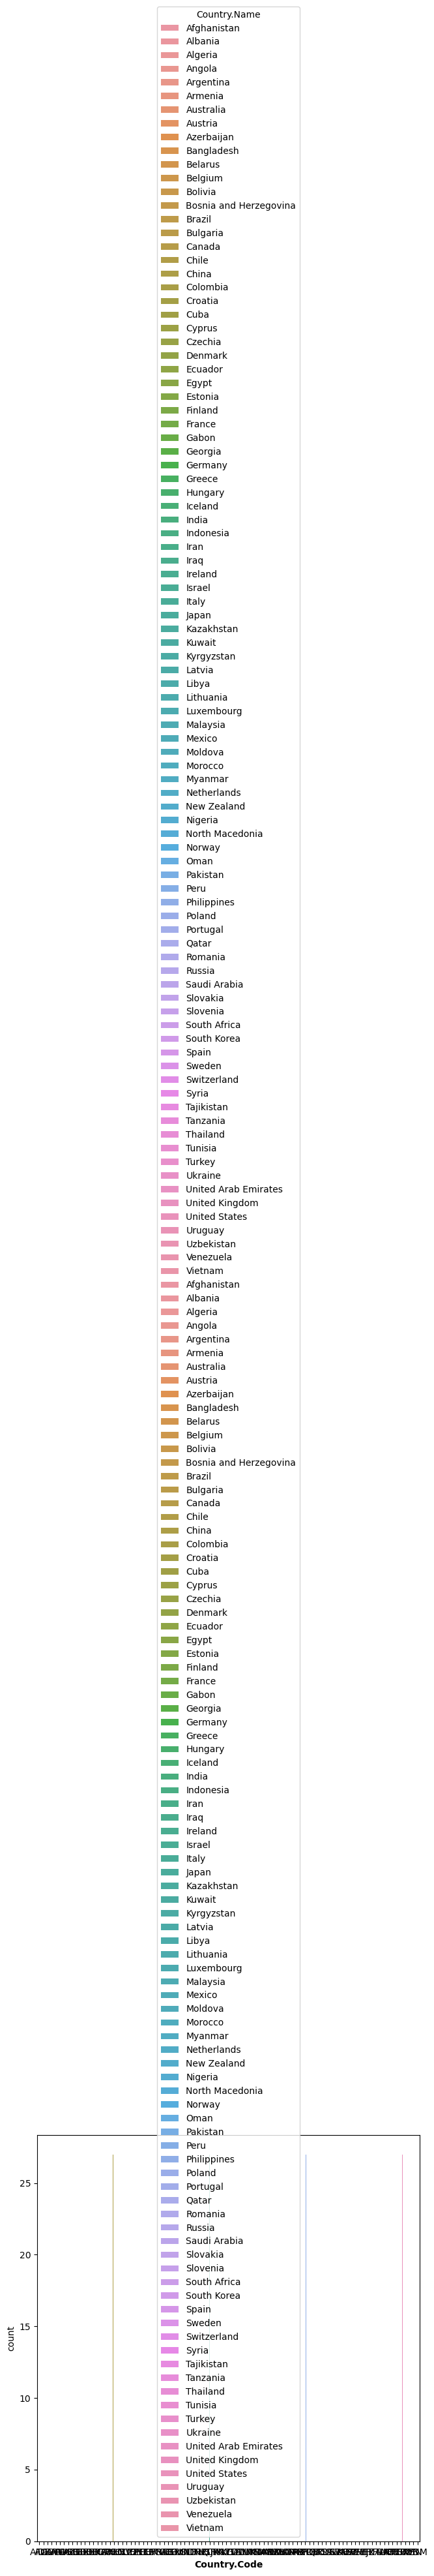

In [175]:

plt.figure(figsize=(7,15))
for i,col in enumerate(categorical_fea):
    plt.plot(1,1,i+1)
    sns.countplot(x=df[col],hue=df['Country.Name'])
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

# Barplot (categorical fea)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

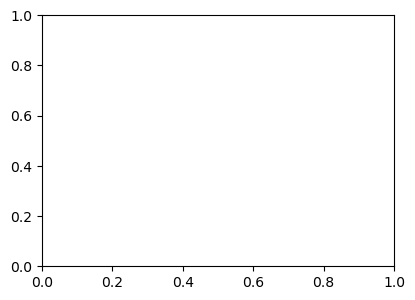

In [41]:

plt.figure(figsize=(10,15))
for i,col in enumerate(categorical_fea):
    plt.subplot(4,2,i+1)
    sns.barplot(x=df[col],y=df['Country.Code'],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

# Regression Plot (numerical fea)

ValueError: num must be 1 <= num <= 8, not 9

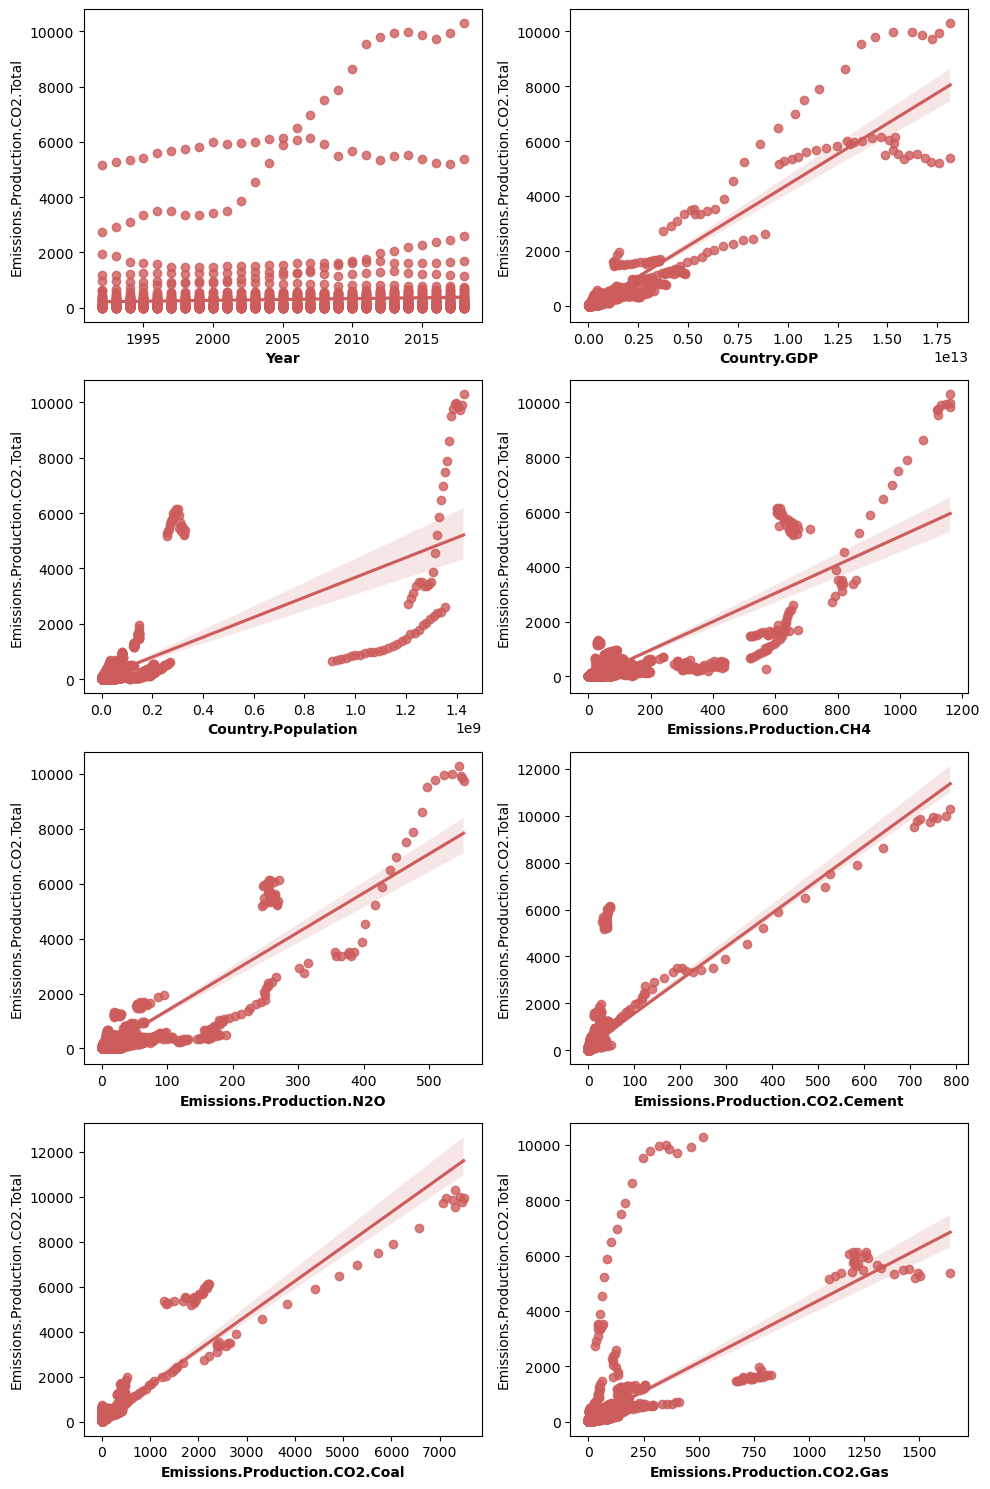

In [176]:
plt.figure(figsize=(10,15))
for i,col in enumerate(numerical_fea):
    plt.subplot(4,2,i+1)
    sns.regplot(x=df[col],y=df['Emissions.Production.CO2.Total'],color='indianred')
    plt.xlabel(col,weight='bold')
    plt.tight_layout()

In [177]:

df.corr()

Year  Country.GDP  Country.Population  \
Year                                1.000000     0.113079            0.029354   
Country.GDP                         0.113079     1.000000            0.648175   
Country.Population                  0.029354     0.648175            1.000000   
Emissions.Production.CH4            0.028438     0.786051            0.837989   
Emissions.Production.N2O            0.030310     0.846020            0.883529   
Emissions.Production.CO2.Cement     0.068303     0.643409            0.754931   
Emissions.Production.CO2.Coal       0.045711     0.801461            0.772625   
Emissions.Production.CO2.Gas        0.066708     0.778053            0.242408   
Emissions.Production.CO2.Oil        0.025967     0.936865            0.470343   
Emissions.Production.CO2.Flaring    0.083354     0.464775            0.116861   
Emissions.Production.CO2.Other      0.025796     0.705395            0.719724   
Emissions.Production.CO2.Total      0.051588     0.941533            0.702120   
Emissions.Global Share.CO2.Cement   0.001290     0.636176            0.816363   
Emissions.Global Share.CO2.Coal     0.000342     0.801357            0.792913   
Emissions.Global Share.CO2.Gas     -0.002169     0.734185            0.226106   
Emissions.Global Share.CO2.Oil     -0.006308     0.913564            0.458437   
Emissions.Global Share.CO2.Flaring -0.000182     0.458094            0.118549   
Emissions.Global Share.CO2.Total   -0.001084     0.921248            0.692353   

                                    Emissions.Production.CH4  \
Year                                                0.028438   
Country.GDP                                         0.786051   
Country.Population                                  0.837989   
Emissions.Production.CH4                            1.000000   
Emissions.Production.N2O                            0.923677   
Emissions.Production.CO2.Cement                     0.685712   
Emissions.Production.CO2.Coal                       0.773973   
Emissions.Production.CO2.Gas                        0.612057   
Emissions.Production.CO2.Oil                        0.694259   
Emissions.Production.CO2.Flaring                    0.475300   
Emissions.Production.CO2.Other                      0.728598   
Emissions.Production.CO2.Total                      0.829348   
Emissions.Global Share.CO2.Cement                   0.729814   
Emissions.Global Share.CO2.Coal                     0.799762   
Emissions.Global Share.CO2.Gas                      0.598164   
Emissions.Global Share.CO2.Oil                      0.684558   
Emissions.Global Share.CO2.Flaring                  0.483961   
Emissions.Global Share.CO2.Total                    0.830057   

                                    Emissions.Production.N2O  \
Year                                                0.030310   
Country.GDP                                         0.846020   
Country.Population                                  0.883529   
Emissions.Production.CH4                            0.923677   
Emissions.Production.N2O                            1.000000   
Emissions.Production.CO2.Cement                     0.797516   
Emissions.Production.CO2.Coal                       0.880783   
Emissions.Production.CO2.Gas                        0.500412   
Emissions.Production.CO2.Oil                        0.721084   
Emissions.Production.CO2.Flaring                    0.322618   
Emissions.Production.CO2.Other                      0.833199   
Emissions.Production.CO2.Total                      0.889925   
Emissions.Global Share.CO2.Cement                   0.839929   
Emissions.Global Share.CO2.Coal                     0.902280   
Emissions.Global Share.CO2.Gas                      0.485380   
Emissions.Global Share.CO2.Oil                      0.709141   
Emissions.Global Share.CO2.Flaring                  0.333529   
Emissions.Global Share.CO2.Total                    0.883874   

                                    Emissions.Production.CO2.Cemen

<AxesSubplot:>

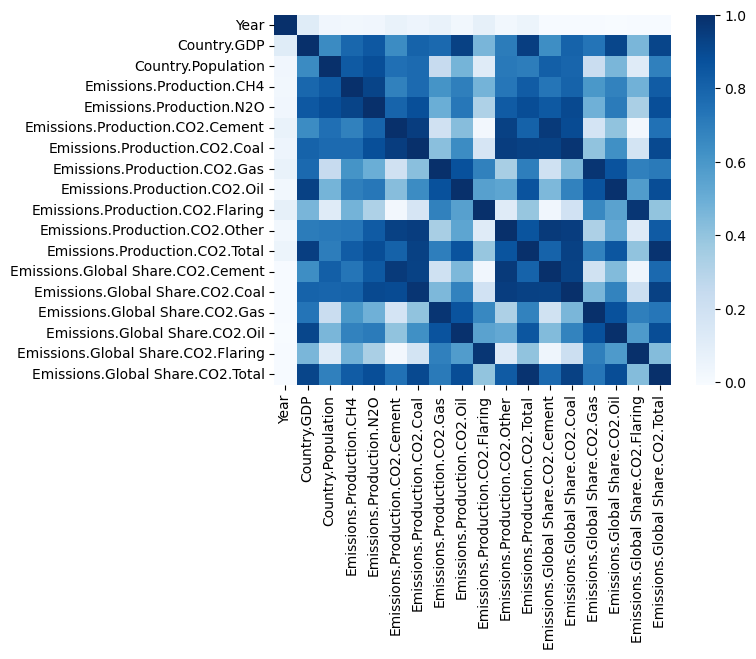

In [178]:

sns.heatmap(df.corr(),cmap='Blues')

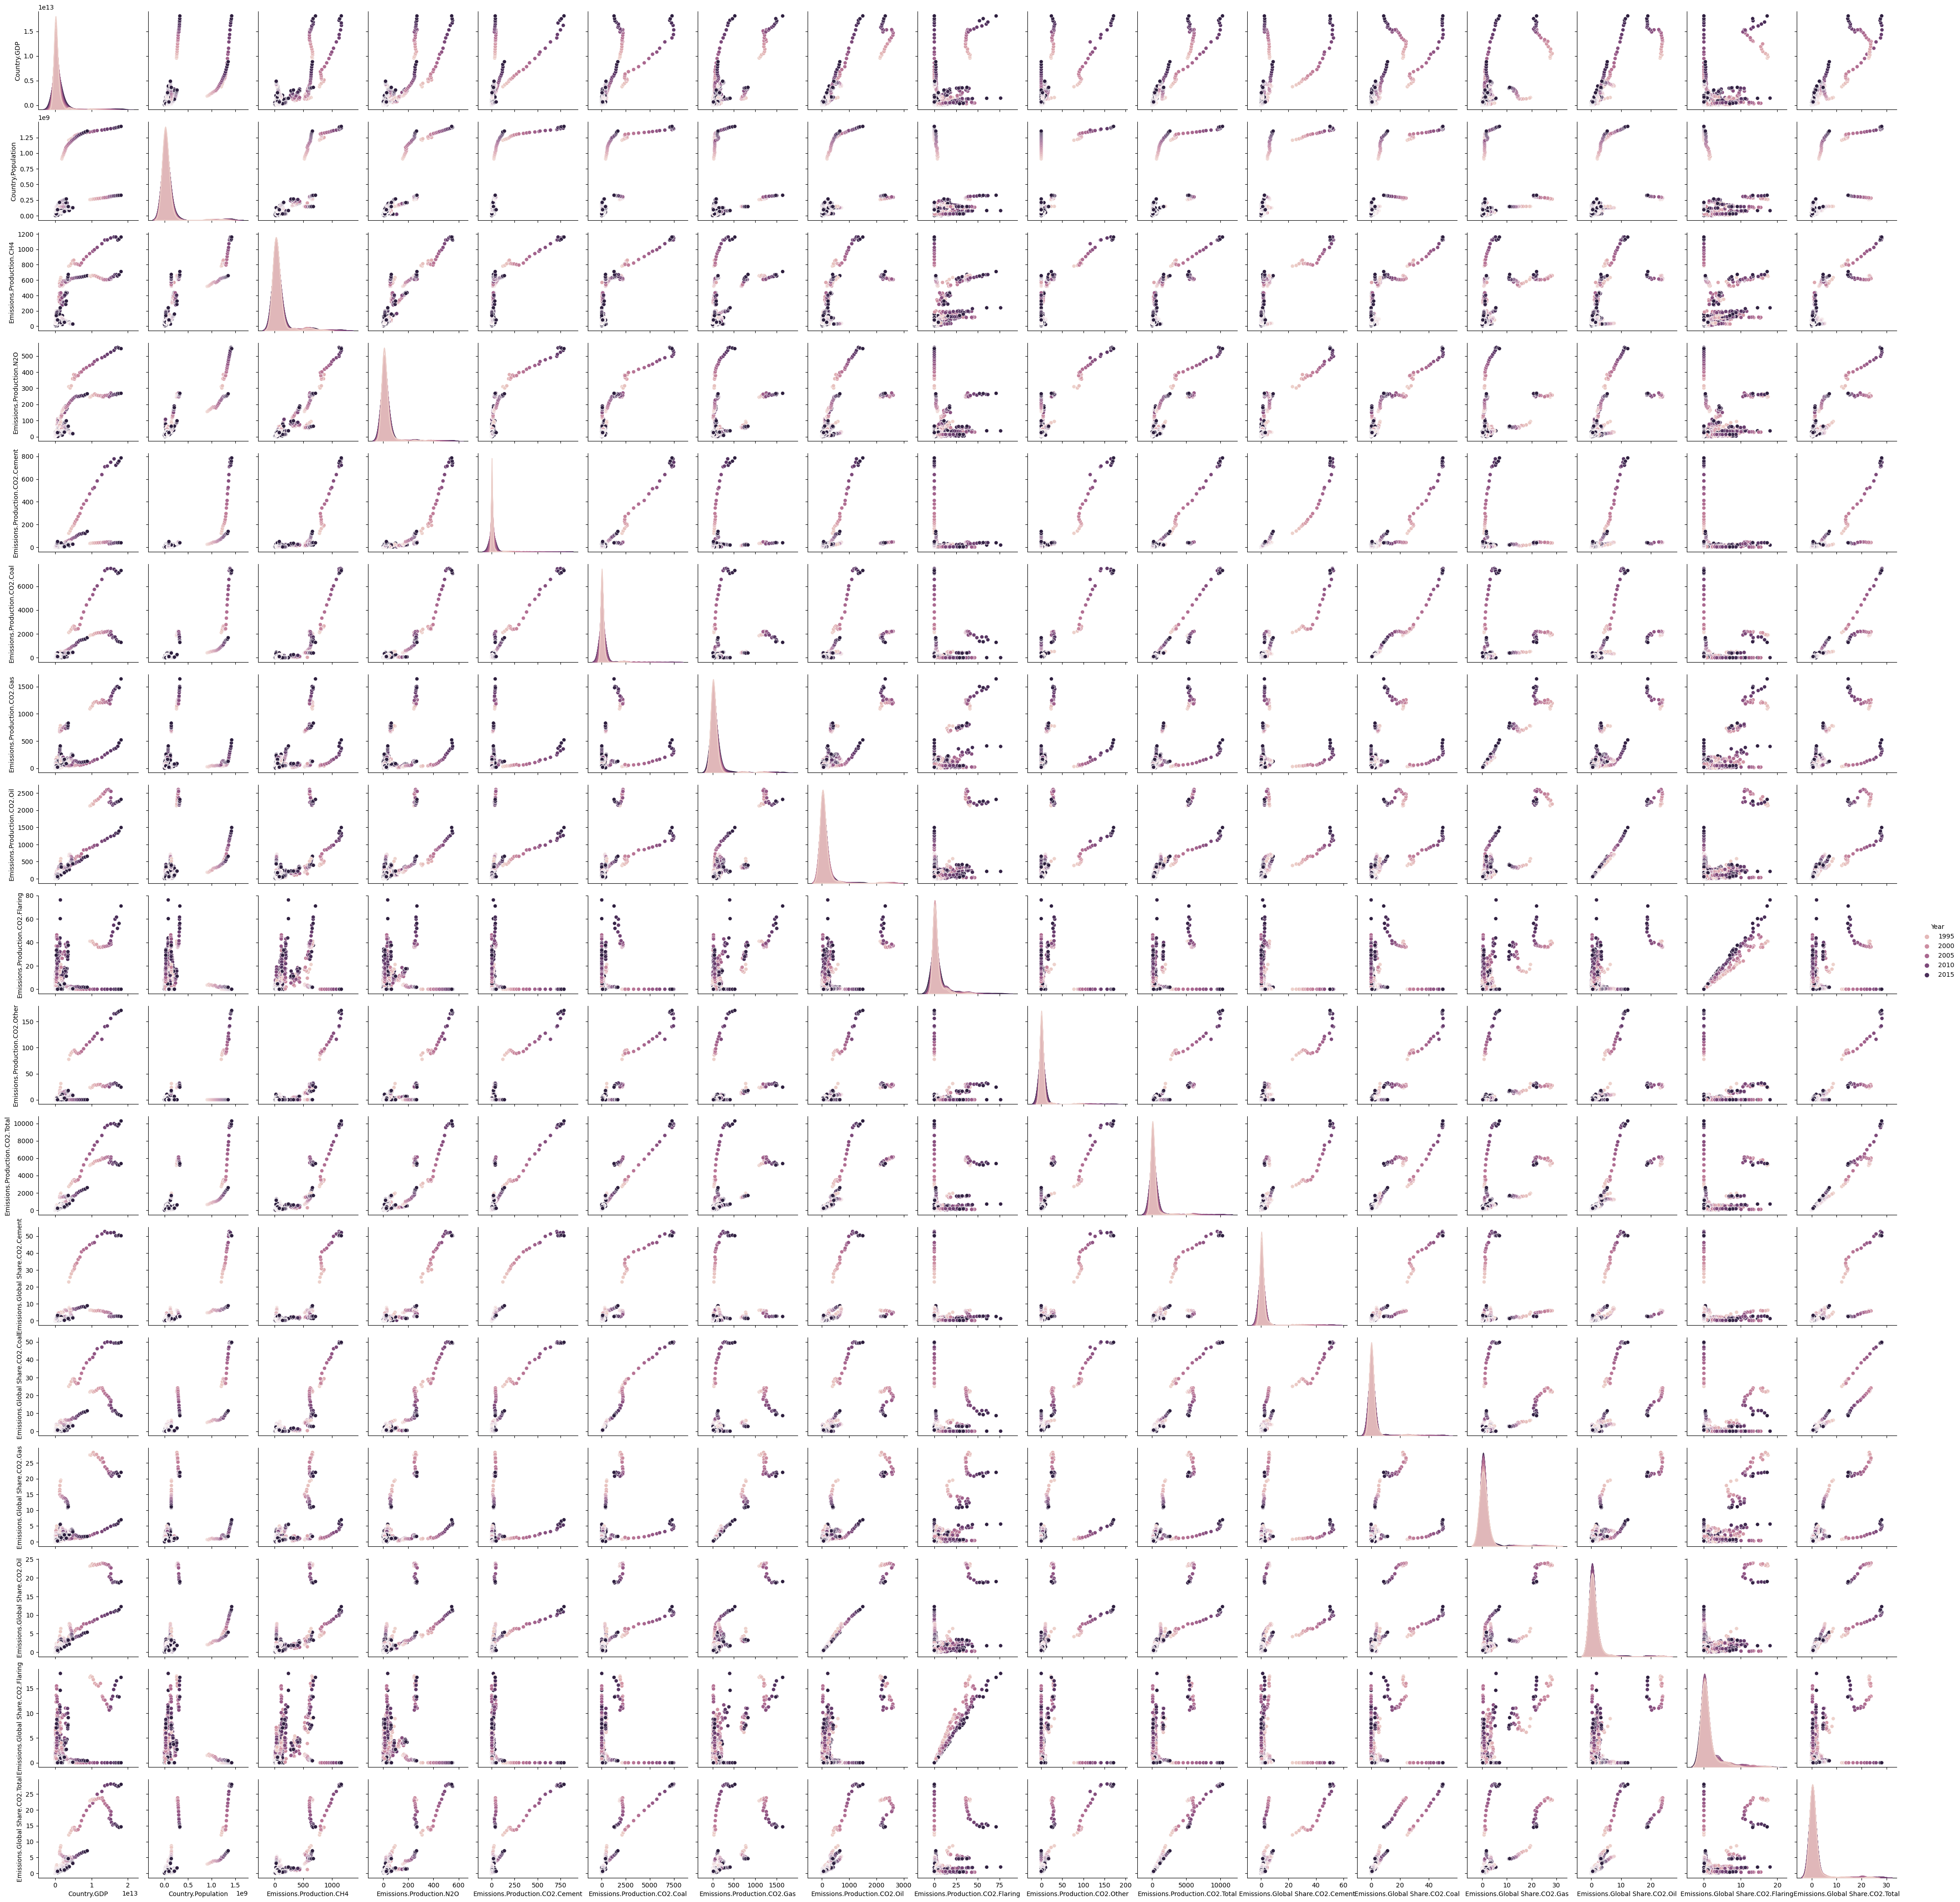

In [179]:
sns.pairplot(data=df,hue='Year')

# Evaluate Model on Different experiments

In [180]:
X =df.drop(['Emissions.Production.CO2.Total','Country.Name','Country.Code'],axis=1)
y = df['Emissions.Production.CO2.Total']

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3, random_state=42)

In [182]:
print(X_train.shape, y_train.shape)

(1738, 17) (1738,)


In [183]:
print(X_test.shape, y_test.shape)

(746, 17) (746,)


# Standardize or feature scalling the dataset

In [184]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler
     

StandardScaler()

n a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [185]:
X_train = scaler.fit_transform(X_train)

In [186]:

X_test = scaler.transform(X_test)

In [187]:

X_train

array([[ 1.55872614, -0.39624117, -0.33811558, ..., -0.37185916,
        -0.45065532, -0.33059916],
       [-0.12263825, -0.22028095, -0.29314045, ..., -0.16620774,
        -0.43792711, -0.18835395],
       [ 1.42939042, -0.36443099, -0.28856165, ..., -0.2967173 ,
        -0.45065532, -0.310751  ],
       ...,
       [ 1.3000547 , -0.28256864, -0.30653758, ..., -0.3085818 ,
        -0.45065532, -0.27767071],
       [ 1.55872614, -0.38709222, -0.33881659, ..., -0.36394949,
        -0.45065532, -0.33059916],
       [ 1.3000547 , -0.38337448, -0.32771445, ..., -0.36790433,
        -0.45065532, -0.32729114]])

In [188]:

X_test

array([[ 0.26536892, -0.35594207, -0.30868949, ..., -0.33626565,
        -0.43368437, -0.27767071],
       [ 0.00669748, -0.3618426 , -0.31821167, ..., -0.23739477,
         0.18575523, -0.27436268],
       [ 1.55872614,  0.56136643, -0.07562477, ...,  0.20950158,
        -0.45065532,  0.26815395],
       ...,
       [ 1.42939042, -0.27919899, -0.31867903, ..., -0.31253664,
        -0.42095616, -0.30413494],
       [ 1.17071898, -0.18528231, -0.10767606, ..., -0.26112378,
        -0.17487741, -0.09903719],
       [-1.41599547, -0.38311161, -0.30123886, ..., -0.34022048,
        -0.40398521, -0.31405902]])

# Model Training

In [189]:


from sklearn.linear_model import LinearRegression

In [190]:


regression = LinearRegression()

In [191]:

regression
     

LinearRegression()

In [192]:


regression.fit(X_train,y_train)

LinearRegression()

# Coefficient and intercept

In [193]:
print("coefficient ",regression.coef_)

coefficient  [-1.54583923e-06  2.08010862e-04 -1.74933427e-05 -9.10117320e-05
  8.05848838e-05  4.98723658e+01  5.52855834e+02  1.58220038e+02
  2.72801435e+02  7.76975673e+00  1.22901276e+01 -1.45515800e-05
 -6.38405336e-04 -1.36980336e-05 -1.54278067e-04 -1.17907996e-04
  1.06011380e-03]


In [194]:

print("intercept ",regression.intercept_)

intercept  300.24343325661687


In [195]:

# prediction for the test data
reg_pred = regression.predict(X_test)
reg_pred

array([5.57398894e+01, 5.69888205e+01, 6.55746957e+02, 9.98388498e+00,
       1.17908952e+01, 7.11988266e+00, 3.73232914e+02, 6.30988388e+00,
       4.90950885e+02, 4.16000983e+02, 5.42838952e+01, 1.79448826e+01,
       2.03576721e+02, 5.67600000e+02, 1.39448854e+01, 1.52815796e+02,
       2.26330834e+02, 4.76108892e+01, 8.06828773e+01, 4.27288041e+00,
       1.27764873e+02, 8.61467923e+01, 4.09652946e+02, 2.63058803e+01,
       1.03698879e+01, 6.00088470e+00, 5.88888594e+01, 2.73078814e+03,
       1.24985766e+02, 1.87178799e+01, 8.55388605e+00, 4.02403024e+02,
       1.01359902e+02, 1.27126892e+02, 4.60088930e+01, 2.14668738e+01,
       1.59118814e+01, 1.22084846e+02, 1.71974766e+02, 3.95428018e+02,
       3.75428974e+01, 4.53008883e+01, 4.82928630e+01, 9.98719054e+01,
       1.87008815e+01, 1.54759886e+03, 5.35882417e+03, 3.77312801e+02,
       4.55307806e+02, 3.49688219e+00, 1.84083759e+02, 1.85657792e+02,
       3.96066819e+02, 3.51493388e+03, 6.10209742e+02, 1.22994906e+02,
      

In [196]:


# Mean_squared_error, Mean_absolute_error

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

9.798826171636344e-08
0.0001970059890128642
0.00031303076800270516


In [197]:

# Performance metrics
# R squared and adjusted R square
# R squared
from sklearn.metrics import r2_score
linear_score=r2_score(y_test,reg_pred)
print(linear_score)

# Adjusted R Squared
#### adjusted R square
#### display adjusted R-squared
print(1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.9999999999998999
0.9999999999998975


In [198]:
from numpy import sqrt 
from sklearn.model_selection import cross_val_predict 

In [199]:
def model_det(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    print()
    # train, test Model pred
    y_pred_model_train = model.predict(X_train)
    y_pred_model_test = model.predict(X_test)
    print()
    print("MSE MAE RMSE")
    # MSE MAE RMSE
    print("Mean Square Error ",mean_squared_error(y_test,y_pred_model_test))
    print("Mean Absolute Error ",mean_absolute_error(y_test,y_pred_model_test))
    print("Root Mean Square Error ",np.sqrt(mean_squared_error(y_test,y_pred_model_test)))
    print()
    print("R2Score Model")
    # train, test R2Score model
    R2Score_model_train = r2_score(y_train, y_pred_model_train)
    print("Training R2 Score: ", R2Score_model_train)
    R2Score_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing R2 Score: ",  R2Score_model_test)
    print( )
    print("Adj_R2Score Model")
    # train, test Adj_R2Score model
    Adj_R2Score_model_train = 1 - (1-R2Score_model_train)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("Training Adj_R2 Score: ", Adj_R2Score_model_train)
    Adj_R2Score_model_test = 1 - (1-R2Score_model_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("Testing Adj_R2 Score: ",  Adj_R2Score_model_test)


    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, y, cv=cvn)
    accuracy_cv_model = r2_score(y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

In [200]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
LinearRegression()

LinearRegression()

In [201]:

model_det(regressor,"multilinear regression")

multilinear regression


MSE MAE RMSE
Mean Square Error  9.798826171636344e-08
Mean Absolute Error  0.0001970059890128642
Root Mean Square Error  0.00031303076800270516

R2Score Model
Training R2 Score:  0.999999999999884
Testing R2 Score:  0.9999999999998999

Adj_R2Score Model
Training Adj_R2 Score:  0.9999999999998813
Testing Adj_R2 Score:  0.9999999999998975
RMSE for Training Data:  0.00031259229670724557
RMSE for Testing Data:  0.00031303076800270516
Accuracy for 20 - Fold Cross Predicted:  0.9999999999998643


# Ridge Regression


In [202]:

from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=.99)
ridgeR.fit(X_train,y_train)
model_det(ridgeR,"Ridge Regression ")

Ridge Regression 


MSE MAE RMSE
Mean Square Error  16.887085947208135
Mean Absolute Error  2.106780687913024
Root Mean Square Error  4.109389972636831

R2Score Model
Training R2 Score:  0.9999784120426812
Testing R2 Score:  0.9999827370270377

Adj_R2Score Model
Training Adj_R2 Score:  0.9999779079282933
Testing Adj_R2 Score:  0.9999823339081635
RMSE for Training Data:  4.2642559966359235
RMSE for Testing Data:  4.109389972636831
Accuracy for 20 - Fold Cross Predicted:  0.9999999999955479


/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.19172e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.18829e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.18222e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/abhishekbarandoorujanavejirao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.86251e-28): result may not be accurate.
  r

# Lasso Regression

In [203]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05)
lasso.fit(X_train,y_train)
model_det(lasso,"Lasso Regression ")
     

Lasso Regression 


MSE MAE RMSE
Mean Square Error  0.8519151680407449
Mean Absolute Error  0.39233596635309015
Root Mean Square Error  0.9229925070339113

R2Score Model
Training R2 Score:  0.9999990260280246
Testing R2 Score:  0.9999991291221849

Adj_R2Score Model
Training Adj_R2 Score:  0.9999990032841736
Testing Adj_R2 Score:  0.9999991087857524
RMSE for Training Data:  0.9057549661899855
RMSE for Testing Data:  0.9229925070339113
Accuracy for 20 - Fold Cross Predicted:  0.9999344258803893


# ElasticNet Regression

In [204]:

from sklearn.linear_model import ElasticNet
# Train the model
el_net = ElasticNet(alpha=.02,l1_ratio=.2)
el_net.fit(X_train,y_train)

model_det(el_net,"ElasticNet Regression ")

ElasticNet Regression 


MSE MAE RMSE
Mean Square Error  596.5297591015251
Mean Absolute Error  13.473982752151333
Root Mean Square Error  24.42395871069072

R2Score Model
Training R2 Score:  0.9991950862140772
Testing R2 Score:  0.9993901921779282

Adj_R2Score Model
Training Adj_R2 Score:  0.9991762901503949
Testing Adj_R2 Score:  0.9993759521601051
RMSE for Training Data:  26.038273015327388
RMSE for Testing Data:  24.42395871069072
Accuracy for 20 - Fold Cross Predicted:  0.9999875525990033


# Decision Tree

In [205]:
from sklearn.tree import DecisionTreeRegressor

In [206]:


decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  
decision_tree_reg.fit(X_train, y_train) 
model_det(decision_tree_reg, "Decision_Tree_Regression")

Decision_Tree_Regression


MSE MAE RMSE
Mean Square Error  3635.3270820060648
Mean Absolute Error  27.499448104733833
Root Mean Square Error  60.29367364828639

R2Score Model
Training R2 Score:  0.9981883316146781
Testing R2 Score:  0.9962837547388489

Adj_R2Score Model
Training Adj_R2 Score:  0.9981460261716143
Testing Adj_R2 Score:  0.996196974286322
RMSE for Training Data:  39.06401214787839
RMSE for Testing Data:  60.29367364828639
Accuracy for 20 - Fold Cross Predicted:  0.8494901853909433


# Random Forest

In [207]:
from sklearn.ensemble import RandomForestRegressor
     

In [209]:

random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train,y_train)

model_det(random_forest_reg,"Random Forest Regression")

Random Forest Regression


MSE MAE RMSE
Mean Square Error  1324.467078851645
Mean Absolute Error  6.79620793565692
Root Mean Square Error  36.39322847524859

R2Score Model
Training R2 Score:  0.9997240391638299
Testing R2 Score:  0.9986460518147883

Adj_R2Score Model
Training Adj_R2 Score:  0.9997175950234248
Testing Adj_R2 Score:  0.9986144348928808
RMSE for Training Data:  15.246186204361017
RMSE for Testing Data:  36.39322847524859


KeyboardInterrupt: 

# XGBoost

In [93]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 566.4 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [210]:
import xgboost as xgb

In [211]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123,verbosity=0)
  
# Fitting the model
xgb_r.fit(X_train, y_train)
  

model_det(xgb_r,"Xg_boost")

Xg_boost


MSE MAE RMSE
Mean Square Error  5143.753297172534
Mean Absolute Error  15.099372940472561
Root Mean Square Error  71.71996442534348

R2Score Model
Training R2 Score:  0.9969702232072531
Testing R2 Score:  0.9947417526995674

Adj_R2Score Model
Training Adj_R2 Score:  0.9968994729250049
Testing Adj_R2 Score:  0.9946189639576617
RMSE for Training Data:  50.51761174833117
RMSE for Testing Data:  71.71996442534348
Accuracy for 20 - Fold Cross Predicted:  0.8584724984870651


# GradientBoostRegression

In [212]:
from sklearn.ensemble import GradientBoostingRegressor     

In [213]:

Gb_reg = GradientBoostingRegressor(random_state=0)
Gb_reg.fit(X_train, y_train)

model_det(Gb_reg,"Gradient Boost Regression ")

Gradient Boost Regression 


MSE MAE RMSE
Mean Square Error  918.027011434293
Mean Absolute Error  10.0890681888747
Root Mean Square Error  30.298960566895573

R2Score Model
Training R2 Score:  0.9998965873372554
Testing R2 Score:  0.9990615387683441

Adj_R2Score Model
Training Adj_R2 Score:  0.9998941724811199
Testing Adj_R2 Score:  0.9990396241516708
RMSE for Training Data:  9.33306636257673
RMSE for Testing Data:  30.298960566895573
Accuracy for 20 - Fold Cross Predicted:  0.9176481967981177


# KNN Reg

In [214]:

from sklearn.neighbors import KNeighborsRegressor

In [215]:

knn_reg = KNeighborsRegressor(n_neighbors=2)
knn_reg.fit(X_train, y_train)

model_det(knn_reg,"KNeighborsRegressor")


KNeighborsRegressor


MSE MAE RMSE
Mean Square Error  1972.8959551635376
Mean Absolute Error  12.550907506702405
Root Mean Square Error  44.41729342456086

R2Score Model
Training R2 Score:  0.9993439864923543
Testing R2 Score:  0.997983189661142

Adj_R2Score Model
Training Adj_R2 Score:  0.9993286674956099
Testing Adj_R2 Score:  0.997936093815317
RMSE for Training Data:  23.506820140453915
RMSE for Testing Data:  44.41729342456086
Accuracy for 20 - Fold Cross Predicted:  0.6838873560621042


# AdaBoost 

In [216]:

from sklearn.ensemble import AdaBoostRegressor

In [217]:
ada_regr = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_regr.fit(X_train, y_train)

model_det(ada_regr,"AdaBoostRegressor")

AdaBoostRegressor


MSE MAE RMSE
Mean Square Error  11815.97151937215
Mean Absolute Error  70.67427765614376
Root Mean Square Error  108.70129492960123

R2Score Model
Training R2 Score:  0.9906322511389086
Testing R2 Score:  0.9879210186114721

Adj_R2Score Model
Training Adj_R2 Score:  0.9904134987616579
Testing Adj_R2 Score:  0.9876389544856411
RMSE for Training Data:  88.82906955981757
RMSE for Testing Data:  108.70129492960123
Accuracy for 20 - Fold Cross Predicted:  0.876227146139904


In [104]:
df

Year Country.Name Country.Code   Country.GDP  Country.Population  \
0     1992  Afghanistan          AFG  1.267754e+10            14485543   
1     1993  Afghanistan          AFG  9.834581e+09            15816601   
2     1994  Afghanistan          AFG  7.919857e+09            17075728   
3     1995  Afghanistan          AFG  1.230753e+10            18110662   
4     1996  Afghanistan          AFG  1.207013e+10            18853444   
...    ...          ...          ...           ...                 ...   
2479  2014      Vietnam          VNM  5.098024e+11            91713848   
2480  2015      Vietnam          VNM  5.439311e+11            92677080   
2481  2016      Vietnam          VNM  5.776835e+11            93640440   
2482  2017      Vietnam          VNM  6.177747e+11            94600640   
2483  2018      Vietnam          VNM  6.614884e+11            95545960   

      Emissions.Production.CH4  Emissions.Production.N2O  \
0                         7.13                      2.89   
1                         7.21                      2.93   
2                         7.47                      2.76   
3                         7.83                      2.88   
4                         8.67                      3.12   
...                        ...                       ...   
2479                     84.93                     23.48   
2480                     83.85                     25.91   
2481                     81.85                     24.82   
2482                     81.28                     24.89   
2483                     81.42                     25.44   

      Emissions.Production.CO2.Cement  Emissions.Production.CO2.Coal  \
0                               0.046                          0.022   
1                               0.047                          0.018   
2                               0.047                          0.015   
3                               0.047                          0.015   
4                               0.047                          0.007   
...                               ...                            ...   
2479                           32.694                         70.517   
2480                           34.298                         83.191   
2481                           36.822                         81.561   
2482                           42.735                         77.680   
2483                           49.637                         94.927   

      Emissions.Production.CO2.Gas  Emissions.Production.CO2.Oil  \
0                            0.363                         0.927   
1                            0.352                         0.894   
2                            0.338                         0.860   
3                            0.322                         0.824   
4                            0.308                         0.780   
...                            ...                           ...   
2479                        19.599                        46.196   
2480                        20.463                        55.052   
2481                        20.368                        54.015   
2482                        17.877                        56.957   
2483                        18.554                        60.599   

      Emissions.Production.CO2.Flaring  Emissions.Production.CO2.Other  \
0                                0.022                    0.000000e+00   
1                                0.022                    0.000000e+00   
2                                0.022                    2.220446e-16   
3                                0.022                    2.220446e-16   
4                                0.022                    1.000000e-03   
...                                ...                             ...   
2479                             0.000                    0.000000e+00   
2480                             0.000                    0.000000e+00   
2481                             0.000          

In [106]:
sales_by_category = df.groupby('Country.Name')['Emissions.Production.CO2.Total'].sum().sort_values(ascending=False)
print(sales_by_category)

Country.Name
China            168795.803
United States    152500.160
Russia            43308.499
India             37715.963
Japan             33504.989
                    ...    
Armenia             116.103
Afghanistan         106.934
Albania              99.461
Tajikistan           95.990
Iceland              84.018
Name: Emissions.Production.CO2.Total, Length: 92, dtype: float64


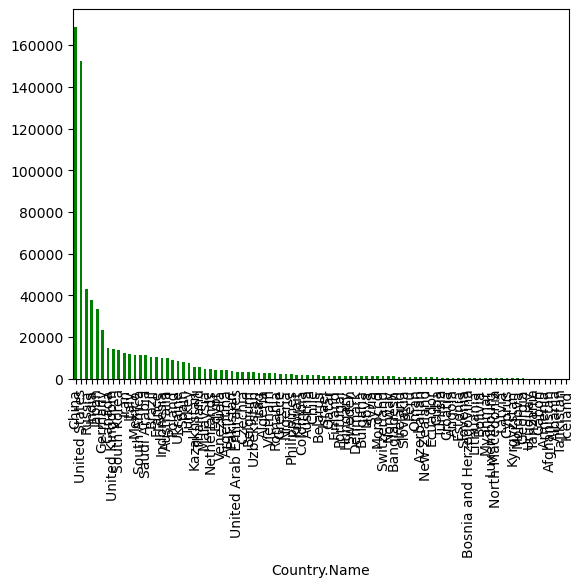

<Figure size 5000x3000 with 0 Axes>

In [118]:
sales_by_category.plot(kind='bar', color='green')
#figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
plt.figure(figsize =(50, 30))
plt.show()

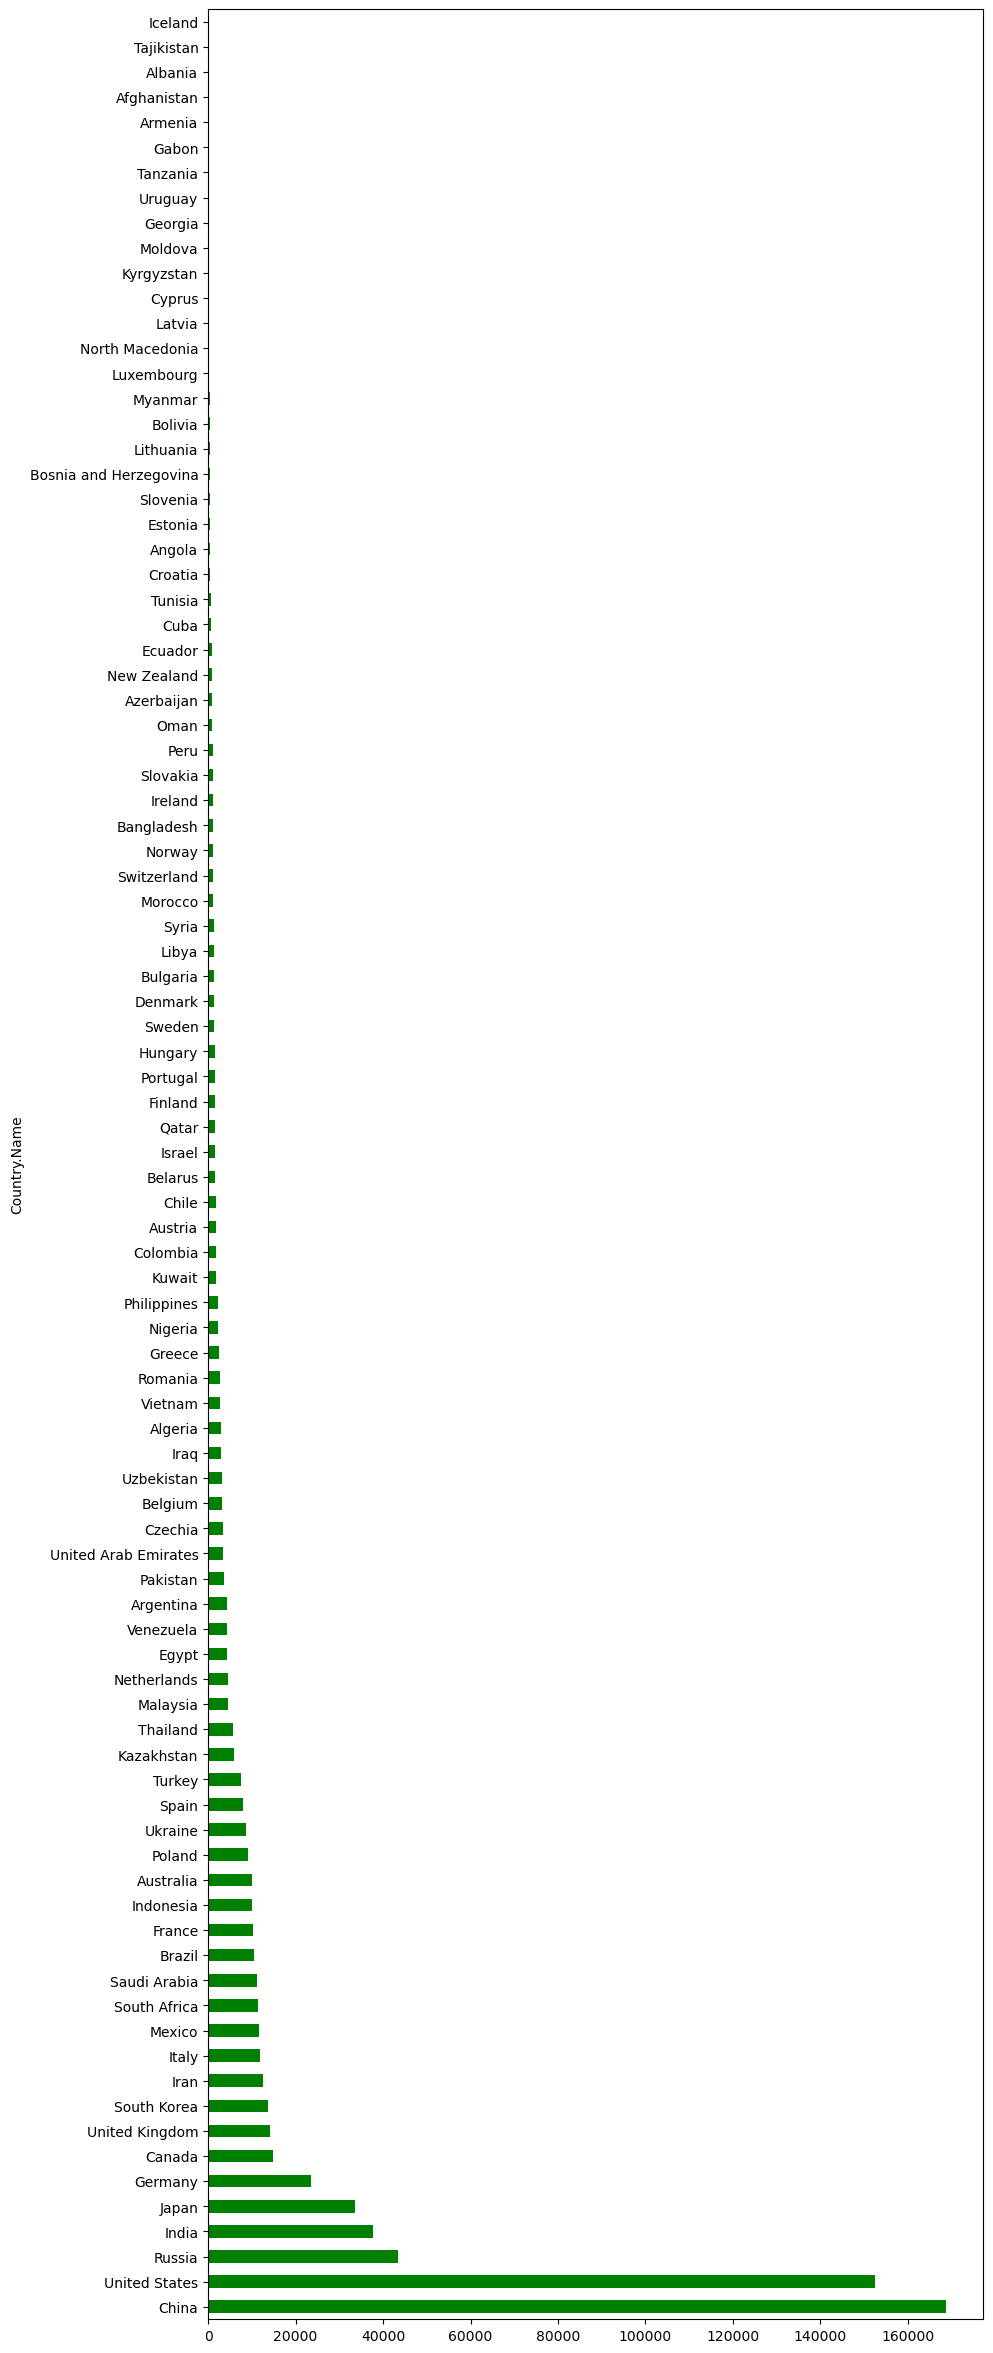

In [127]:

plt.figure(figsize =(10, 30))
sales_by_category.plot(kind='barh', color='green')
#figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
#plt.figure(figsize =(50, 30))
#plt.figure(figsize=(10,60))
#plt.figure().set_figheight(100)
plt.show()

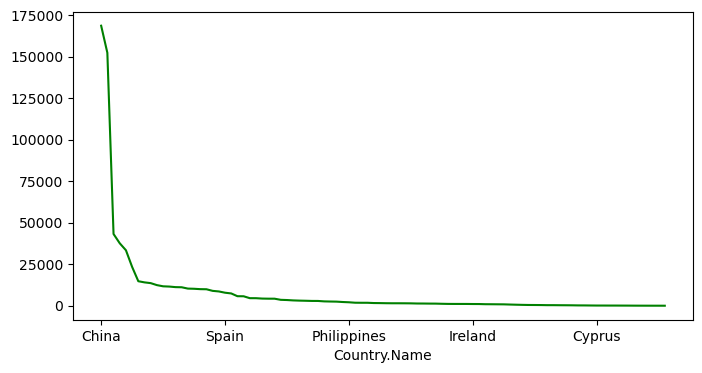

In [133]:
plt.figure(figsize =(8, 4))
sales_by_category.plot(kind='line', color='green')
#figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
#plt.figure(figsize =(50, 30))
#plt.figure(figsize=(10,60))
#plt.figure().set_figheight(100)
plt.show()

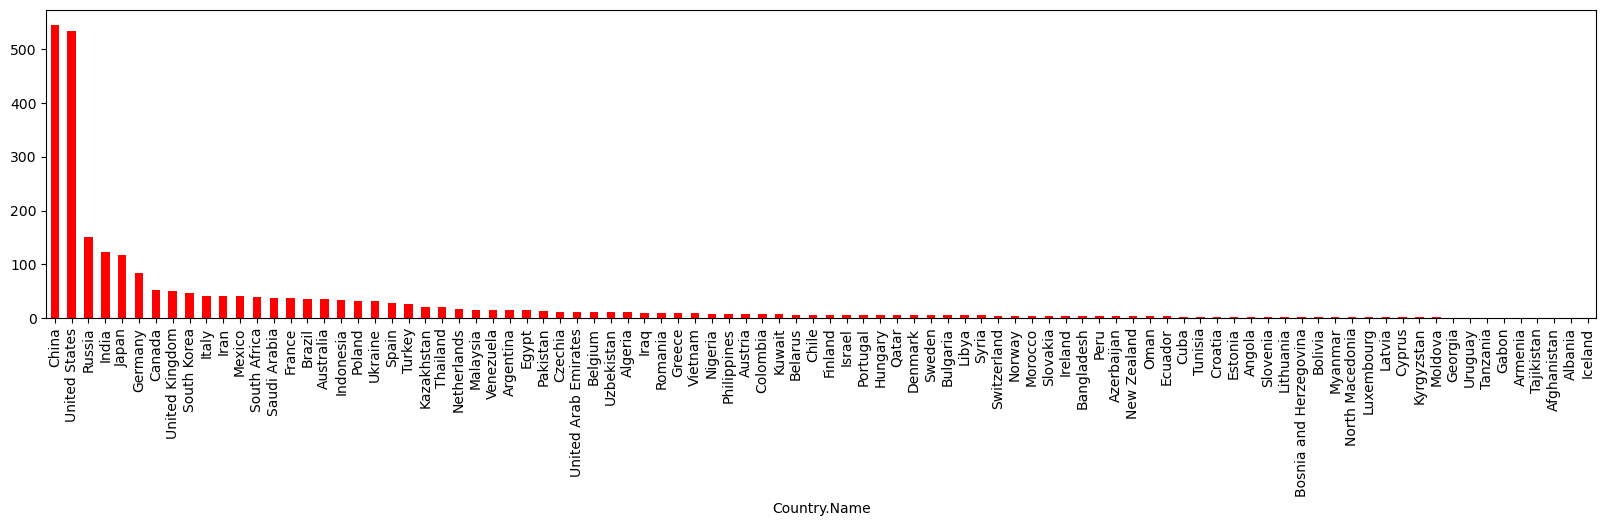

In [141]:
plt.figure(figsize =(20, 4))
sales_by_state = df.groupby('Country.Name')['Emissions.Global Share.CO2.Total'].sum().sort_values(ascending=False)
sales_by_state.plot(kind='bar', color='red')
plt.show()

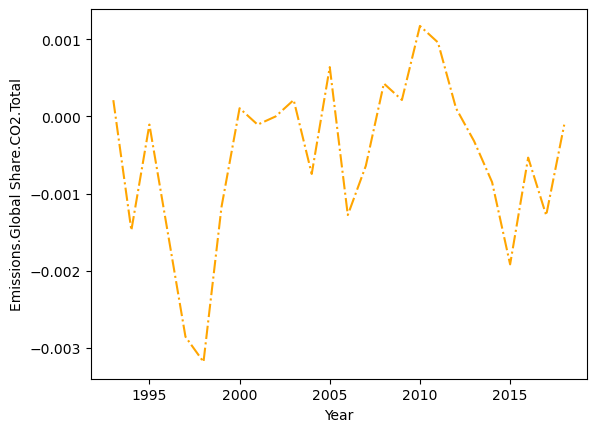

In [144]:
monthly_sales = df.groupby(pd.Grouper(key='Year'))['Emissions.Global Share.CO2.Total'].sum()
monthly_sales_growth = monthly_sales.pct_change()
monthly_sales_growth.plot(kind='line', ls='-.', color='orange')
plt.xlabel('Year')
plt.ylabel('Emissions.Global Share.CO2.Total')
plt.show()

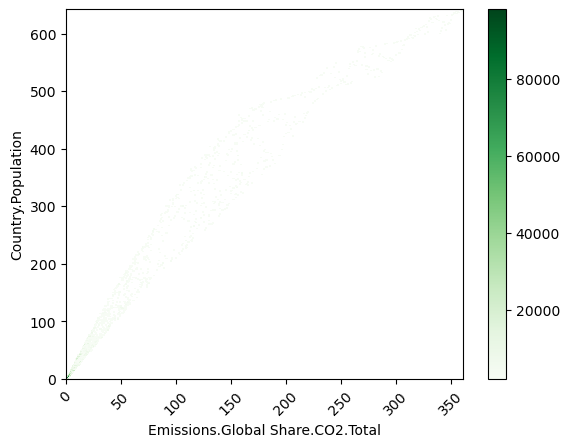

In [151]:
sales_by_month_category = df.groupby(['Country.Population', 'Emissions.Global Share.CO2.Total'])['Year'].sum().unstack()
plt.pcolor(sales_by_month_category, cmap='Greens')
plt.xlabel('Emissions.Global Share.CO2.Total')
plt.ylabel('Country.Population')
plt.xticks(rotation=45)
plt.colorbar()
plt.show()

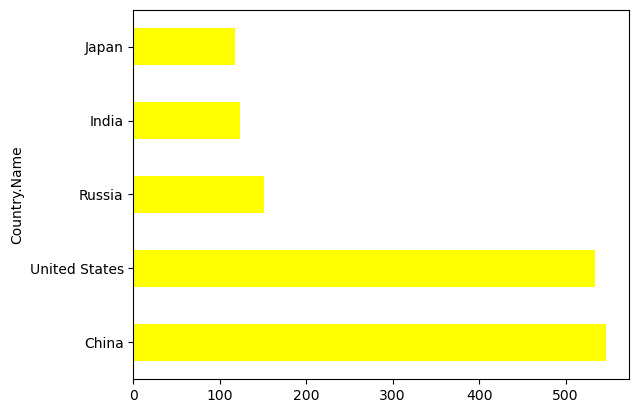

In [153]:
sales_by_product = df.groupby('Country.Name')['Emissions.Global Share.CO2.Total'].sum().sort_values(ascending=False)
sales_by_product.head().plot(kind='barh', color='yellow')
plt.show()

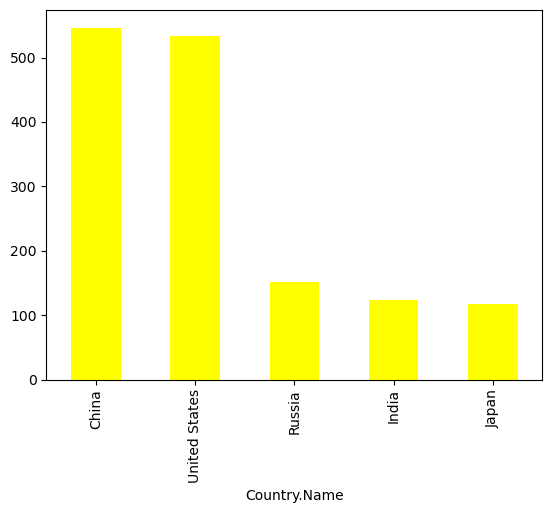

In [154]:
sales_by_product = df.groupby('Country.Name')['Emissions.Global Share.CO2.Total'].sum().sort_values(ascending=False)
sales_by_product.head().plot(kind='bar', color='yellow')
plt.show()

In [152]:
df

Year Country.Name Country.Code   Country.GDP  \
0     1992  Afghanistan          AFG  1.267754e+10   
1     1993  Afghanistan          AFG  9.834581e+09   
2     1994  Afghanistan          AFG  7.919857e+09   
3     1995  Afghanistan          AFG  1.230753e+10   
4     1996  Afghanistan          AFG  1.207013e+10   
...    ...          ...          ...           ...   
2479  2014      Vietnam          VNM  5.098024e+11   
2480  2015      Vietnam          VNM  5.439311e+11   
2481  2016      Vietnam          VNM  5.776835e+11   
2482  2017      Vietnam          VNM  6.177747e+11   
2483  2018      Vietnam          VNM  6.614884e+11   

                Country.Population  Emissions.Production.CH4  \
0    1970-01-01 00:00:00.000000001                      7.13   
1    1970-01-01 00:00:00.000000001                      7.21   
2    1970-01-01 00:00:00.000000001                      7.47   
3    1970-01-01 00:00:00.000000001                      7.83   
4    1970-01-01 00:00:00.000000001                      8.67   
...                            ...                       ...   
2479 1970-01-01 00:00:00.000000169                     84.93   
2480 1970-01-01 00:00:00.000000193                     83.85   
2481 1970-01-01 00:00:00.000000192                     81.85   
2482 1970-01-01 00:00:00.000000195                     81.28   
2483 1970-01-01 00:00:00.000000223                     81.42   

      Emissions.Production.N2O  Emissions.Production.CO2.Cement  \
0                         2.89                            0.046   
1                         2.93                            0.047   
2                         2.76                            0.047   
3                         2.88                            0.047   
4                         3.12                            0.047   
...                        ...                              ...   
2479                     23.48                           32.694   
2480                     25.91                           34.298   
2481                     24.82                           36.822   
2482                     24.89                           42.735   
2483                     25.44                           49.637   

      Emissions.Production.CO2.Coal  Emissions.Production.CO2.Gas  \
0                             0.022                         0.363   
1                             0.018                         0.352   
2                             0.015                         0.338   
3                             0.015                         0.322   
4                             0.007                         0.308   
...                             ...                           ...   
2479                         70.517                        19.599   
2480                         83.191                        20.463   
2481                         81.561                        20.368   
2482                         77.680                        17.877   
2483                         94.927                        18.554   

      Emissions.Production.CO2.Oil  Emissions.Production.CO2.Flaring  \
0                            0.927                             0.022   
1                            0.894                             0.022   
2                            0.860                             0.022   
3                            0.824                             0.022   
4                            0.780                             0.022   
...                            ...                               ...   
2479                        46.196                             0.000   
2480                        55.052                             0.000   
2481                        54.015                             0.000   
2482                        56.957                             0.000   
2483                        60.599                             0.000   

      Emissions.Production.CO2.Other Emissions.Production.CO2.Total  \
0                 